<a href="https://colab.research.google.com/github/2303A52095/GenerativeAI_2025/blob/main/2303a52095_ASS_10_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 64ms/step - accuracy: 0.3492 - loss: 1.7785 - val_accuracy: 0.5572 - val_loss: 1.2485
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 65ms/step - accuracy: 0.5975 - loss: 1.1447 - val_accuracy: 0.5656 - val_loss: 1.3127
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 63ms/step - accuracy: 0.6754 - loss: 0.9270 - val_accuracy: 0.6652 - val_loss: 0.9666
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 64ms/step - accuracy: 0.7274 - loss: 0.7905 - val_accuracy: 0.6996 - val_loss: 0.8884
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 62ms/step - accuracy: 0.7616 - loss: 0.6943 - val_accuracy: 0.7072 - val_loss: 0.9205
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7872 - loss: 0.6213
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.7066 - loss: 0.9189
Training Accuracy: 0.7857
Testing Accuracy: 0.7072


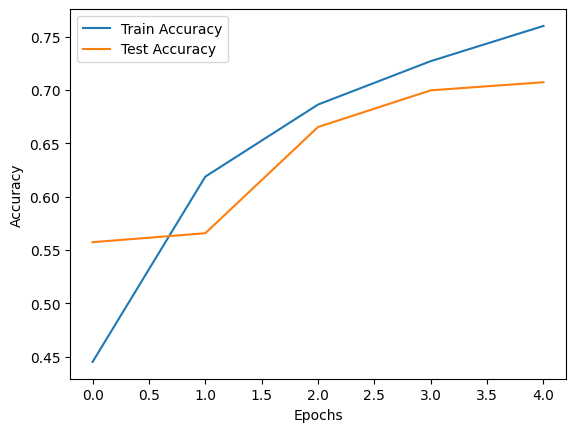

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()